# Sarcastic_comments_on_reddit
Reddit is a network of communities where people may explore their interests, hobbies, and passions, on the other side there is many people in different communities use reddit, Unfortunately, there is many comments that contain sarcasm.
Sarcasm it is the use of words that obviously mean the reverse of what they say, used with the intent of hurting someone's feelings or criticising something
# Objective
The main objective of this project it is sarcastic comments detecor by using Logistic Regression and Naive Bayes algorthims , and explore the dataset by visualization using ```matplotlib.pyplot``` and ```seaborn```
# Dataset
The dataset contains 1.3 million Sarcastic comments from the Internet commentary website Reddit. The dataset was generated by scraping comments from Reddit containing the (sarcasm) tag. This tag is often used by Redditors to indicate that their comment is in jest and not meant to be taken seriously, and is generally a reliable indicator of sarcastic comment content.



# Import the Packges 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import gdown
from wordcloud import WordCloud, STOPWORDS

# Loading the Dataset and Explore

In [5]:
url = "https://drive.google.com/uc?id=1udfPvhw4IDs66SldbbHsb-07L3tQZp9O"
output = 'train-balanced-sarcasm.csv'
gdown.download(url,output)
df = pd.read_csv(output)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [7]:
df.describe()

,label,score,ups,downs
count,1010826.0,1.010826e+06,1.010826e+06,1.010826e+06
mean,0.5,6.885676e+00,5.498885e+00,-1.458629e-01
std,0.5,4.834288e+01,4.127297e+01,3.529689e-01
min,0.0,-5.070000e+02,-5.070000e+02,-1.000000e+00
25%,0.0,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.5,2.000000e+00,1.000000e+00,0.000000e+00
75%,1.0,4.000000e+00,3.000000e+00,0.000000e+00
max,1.0,9.070000e+03,5.163000e+03,0.000000e+00


In [8]:
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


 # Data Cleaning

In [9]:
#check the null values
df.isna().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [10]:
# Removing the null comments and clean it
df.dropna(subset=['comment'], inplace=True)
df['comment'] = df['comment'].str.lower()
df['comment'] = df['comment'].str.replace('[^\w\s]','')

In [11]:
#convert date of comment to datetime data type
df.created_utc = pd.to_datetime(df.created_utc)


In [12]:
# drop uneeded featuers
df.drop(['date','author','parent_comment'], axis=1, inplace=True)

In [13]:
#check on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   label        1010773 non-null  int64         
 1   comment      1010773 non-null  object        
 2   subreddit    1010773 non-null  object        
 3   score        1010773 non-null  int64         
 4   ups          1010773 non-null  int64         
 5   downs        1010773 non-null  int64         
 6   created_utc  1010773 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 61.7+ MB


```label``` : Target: Sarcasm

```comment```: Text of comment 

```subreddit```: Origin subreddit

```score```: Comment score

```ups```: Upvotes

```downs```: Downvotes

```created_utc```: Created datetime

In [14]:
df.label.value_counts()

0    505405
1    505368
Name: label, dtype: int64

# Visualization

Text(0.5, 1.0, 'Compare Between Sarcastic and Non-Sarcastic comments')

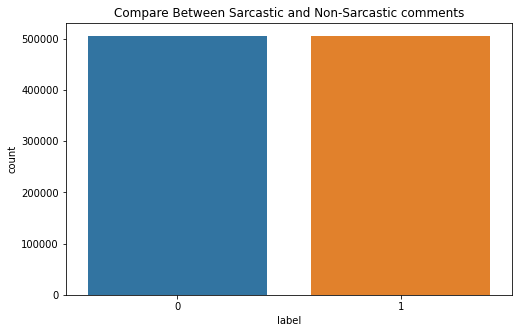

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='label',  data= df)
plt.title("Compare Between Sarcastic and Non-Sarcastic comments")



As we see in the above plot the data is balanced

Text(0.5, 1.0, 'Top 5 Most Popluar Subreddit')

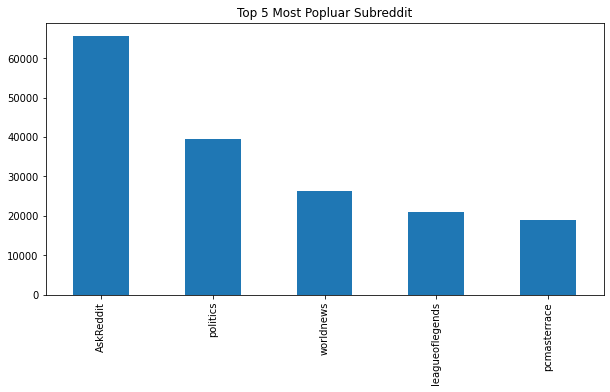

In [32]:
plt.figure(figsize=(10,5))
df['subreddit'].value_counts().nlargest(5).plot(kind='bar')
plt.title("Top 5 Most Popluar Subreddit")

The most popluar subreddit is AskReddit

Text(0.5, 1.0, 'Sarcastic Comments on the weekdays')

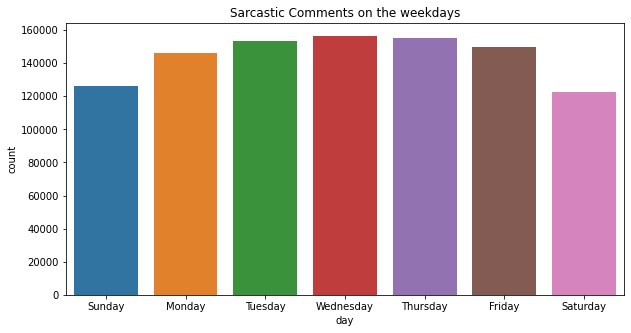

In [19]:
plt.figure(figsize=(10,5))
df['day']=df['created_utc'].dt.day_name()
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sns.countplot(x=df.day,  data= df.label==1 , order = order)
plt.title("Sarcastic Comments on the weekdays")

Most sarcasm comments are posted on Wednesday and Thursday  

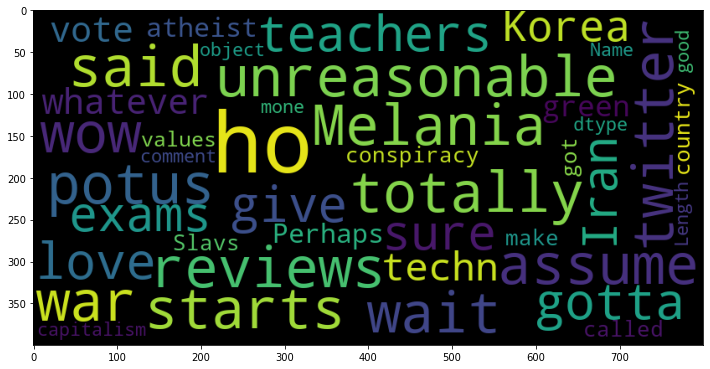

In [36]:
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud.generate(str(df.loc[df['label'] == 1, 'comment']))
plt.grid(b= False)
plt.imshow(wordcloud);


Apply vectorzition on the dataset and split it

In [34]:
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer.fit_transform(df['comment'])
x_train, x_test, y_train, y_test = train_test_split(X_tf_idf, df['label'], random_state=42)


# Model

#Logistic Regression

In [45]:
logit = LogisticRegression(random_state= 42)
logit.fit(x_train, y_train)
predicted_class=logit.predict(x_test)
test_accuracy = accuracy_score(y_test,predicted_class)
print("Accuracy score: ",test_accuracy )


Accuracy score:  0.6939856110552685


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [41]:
from sklearn.metrics import classification_report
y_pred = logit.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71    126046
           1       0.71      0.65      0.68    126648

    accuracy                           0.69    252694
   macro avg       0.70      0.69      0.69    252694
weighted avg       0.70      0.69      0.69    252694



# Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)
test_accuracy= nb.score(x_test, y_test)
print("Accuracy score: ",test_accuracy )

Accuracy score:  0.6747014175247532


In [38]:
from sklearn.metrics import classification_report
y_pred = nb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67    126046
           1       0.67      0.68      0.68    126648

    accuracy                           0.67    252694
   macro avg       0.67      0.67      0.67    252694
weighted avg       0.67      0.67      0.67    252694



# Conclustion
Based on the accuracy the Logistic Regression is better than Naive Bayes by 69% accuracy